In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("world_population_worldbank.csv")
print(df.head())

                  Country Name Country Code         1960         1961  \
0                        Aruba          ABW      54608.0      55811.0   
1  Africa Eastern and Southern          AFE  130692579.0  134169237.0   
2                  Afghanistan          AFG    8622466.0    8790140.0   
3   Africa Western and Central          AFW   97256290.0   99314028.0   
4                       Angola          AGO    5357195.0    5441333.0   

          1962         1963         1964         1965         1966  \
0      56682.0      57475.0      58178.0      58782.0      59291.0   
1  137835590.0  141630546.0  145605995.0  149742351.0  153955516.0   
2    8969047.0    9157465.0    9355514.0    9565147.0    9783147.0   
3  101445032.0  103667517.0  105959979.0  108336203.0  110798486.0   
4    5521400.0    5599827.0    5673199.0    5736582.0    5787044.0   

          1967  ...         2014         2015         2016         2017  \
0      59522.0  ...     103594.0     104257.0     104874.0     10

      Population
1960     667.070
1965     715.185
1970     818.315
1975     916.395
1978     956.165
1990    1135.185
2000    1262.645
2010    1337.705
2020    1411.100


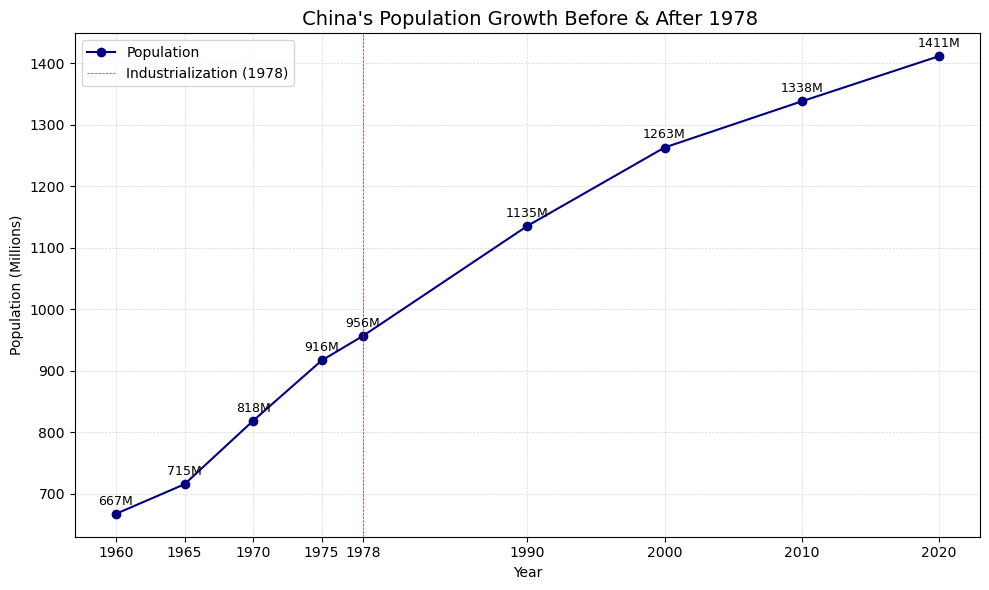

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter China
china_df = df[df['Country Name'] == 'China']

# Include more years for better trend visibility
years = ['1960','1965', '1970', '1975','1978', '1990', '2000','2010','2020']
china_selected = china_df[years].T
china_selected.columns = ['Population']

# Convert index to int and scale to millions
china_selected.index = china_selected.index.astype(int)
china_selected['Population'] = china_selected['Population'] / 1000000
print(china_selected)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(china_selected.index, china_selected['Population'], marker='o', linestyle='-', color='navy', label='Population')

# Annotate each point
for year, pop in zip(china_selected.index, china_selected['Population']):
    plt.text(year, pop + 15, f"{pop:.0f}M", ha='center', fontsize=9)

# Add vertical line for 1978
plt.axvline(x=1978, color='crimson', linestyle='--', linewidth=0.5, label='Industrialization (1978)')

# Labels & styling
plt.title(" China's Population Growth Before & After 1978", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.legend()
plt.grid(True, alpha=0.5, linestyle="--",linewidth=0.5)
plt.xticks(china_selected.index)
plt.tight_layout()
plt.show()


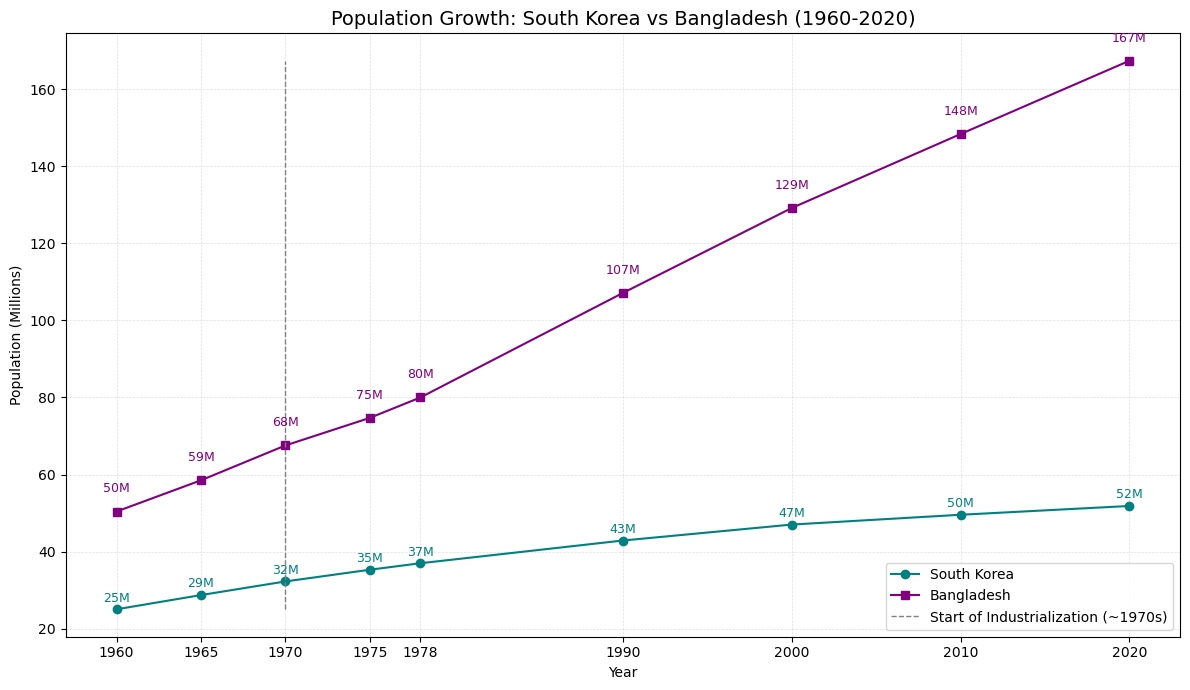

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter South Korea and Bangladesh
skorea_df = df[df['Country Name'] == 'Korea, Rep.']
bangladesh_df = df[df['Country Name'] == 'Bangladesh']

# Years to compare
years = ['1960', '1965', '1970', '1975', '1978', '1990', '2000', '2010', '2020']

# Get South Korea data
skorea_selected = skorea_df[years].T
skorea_selected.columns = ['South Korea']
skorea_selected.index = skorea_selected.index.astype(int)
skorea_selected['South Korea'] = skorea_selected['South Korea'] / 1_000_000  # to millions

# Get Bangladesh data
bangladesh_selected = bangladesh_df[years].T
bangladesh_selected.columns = ['Bangladesh']
bangladesh_selected.index = bangladesh_selected.index.astype(int)
bangladesh_selected['Bangladesh'] = bangladesh_selected['Bangladesh'] / 1_000_000  # to millions

# Merge both into one DataFrame
combined = pd.concat([skorea_selected, bangladesh_selected], axis=1)

# Plot
plt.figure(figsize=(12, 7))
plt.plot(combined.index, combined['South Korea'], marker='o', label='South Korea', color='teal')
plt.plot(combined.index, combined['Bangladesh'], marker='s', label='Bangladesh', color='purple')

# Annotate each point
for year in combined.index:
    plt.text(year, combined['South Korea'][year] + 2, f"{combined['South Korea'][year]:.0f}M", ha='center', fontsize=9, color='teal')
    plt.text(year, combined['Bangladesh'][year] + 5, f"{combined['Bangladesh'][year]:.0f}M", ha='center', fontsize=9, color='purple')

# Optional: Add industrialization marker (say ~1970 for both)
plt.plot([1970, 1970], [combined.min().min(), combined.max().max()], color='gray', linestyle='--', linewidth=1, label='Start of Industrialization (~1970s)')

# Labels and Styling
plt.title("Population Growth: South Korea vs Bangladesh (1960-2020)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.grid(True, alpha=0.4, linestyle="--", linewidth=0.5)
plt.legend()
plt.xticks(combined.index)
plt.tight_layout()
plt.show()


110    126.014024
151     34.268528
Name: Population, dtype: float64


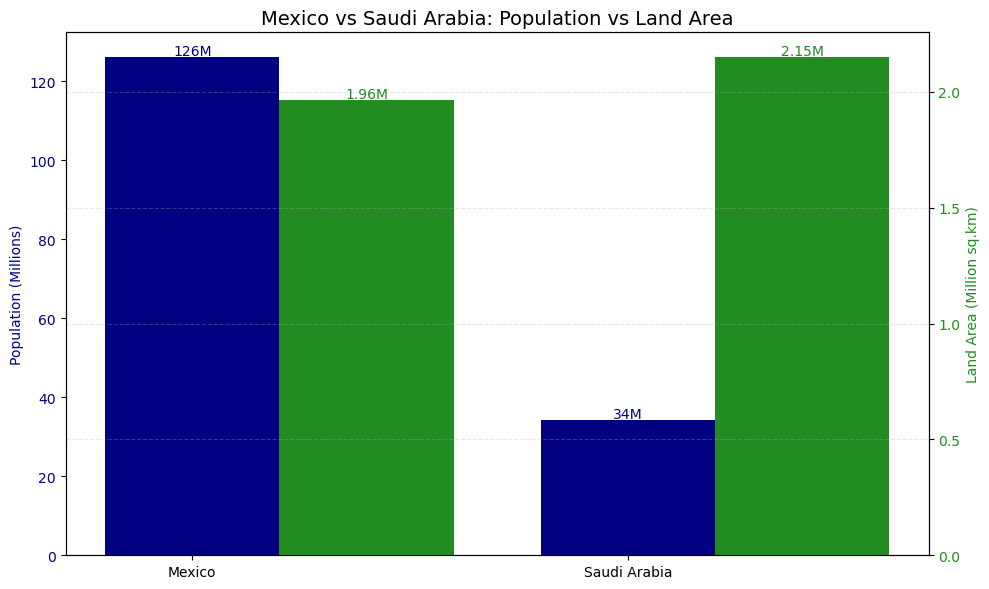

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
land_df = pd.read_csv("world-data-2023.csv")
# Filter for Mexico and Saudi Arabia
countries = ['Mexico', 'Saudi Arabia']
filtered_df = land_df[land_df['Country'].isin(countries)]

# Select relevant columns
plot_df = filtered_df[['Country', 'Population', 'Land Area(Km2)']].copy()

# Clean and convert to numeric
plot_df['Population'] = plot_df['Population'].str.replace(',', '').astype(float)
plot_df['Land Area(Km2)'] = plot_df['Land Area(Km2)'].str.replace(',', '').astype(float)

# Convert to millions
plot_df['Population'] = plot_df['Population'] / 1_000_000
plot_df['Land Area(Km2)'] = plot_df['Land Area(Km2)'] / 1_000_000

# Set x-axis
x = plot_df['Country']
x_axis = range(len(x))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y-axis: Population
ax1.bar(x_axis, plot_df['Population'], width=0.4, color='navy', align='center', label='Population (Millions)')
ax1.set_ylabel('Population (Millions)', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

print(plot_df["Population"])

# Annotate population bars
for i, val in enumerate(plot_df['Population']):
    ax1.text(i, val + 0.5, f"{val:.0f}M", ha='center', color='navy', fontsize=10)

# Right Y-axis: Land Area
ax2 = ax1.twinx()
ax2.bar([i + 0.4 for i in x_axis], plot_df['Land Area(Km2)'], width=0.4, color='forestgreen', align='center', label='Land Area (Million sq.km)')
ax2.set_ylabel('Land Area (Million sq.km)', color='forestgreen')
ax2.tick_params(axis='y', labelcolor='forestgreen')

# Annotate land area bars
for i, val in enumerate(plot_df['Land Area(Km2)']):
    ax2.text(i + 0.4, val+0.01, f"{val:.2f}M", ha='center', color='forestgreen', fontsize=10)

# Final touches
plt.xticks(x_axis, x)
plt.title("Mexico vs Saudi Arabia: Population vs Land Area", fontsize=14)
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


In [43]:
df1 = pd.read_csv("world_population_withContinent.csv")
print(df1.columns)

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')


/tmp/ipykernel_6301/3894228715.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_df[year] = asia_df[year].astype(str).str.replace(',', '').astype(float)
/tmp/ipykernel_6301/3894228715.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_df[year] = asia_df[year].astype(str).str.replace(',', '').astype(float)
/tmp/ipykernel_6301/3894228715.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

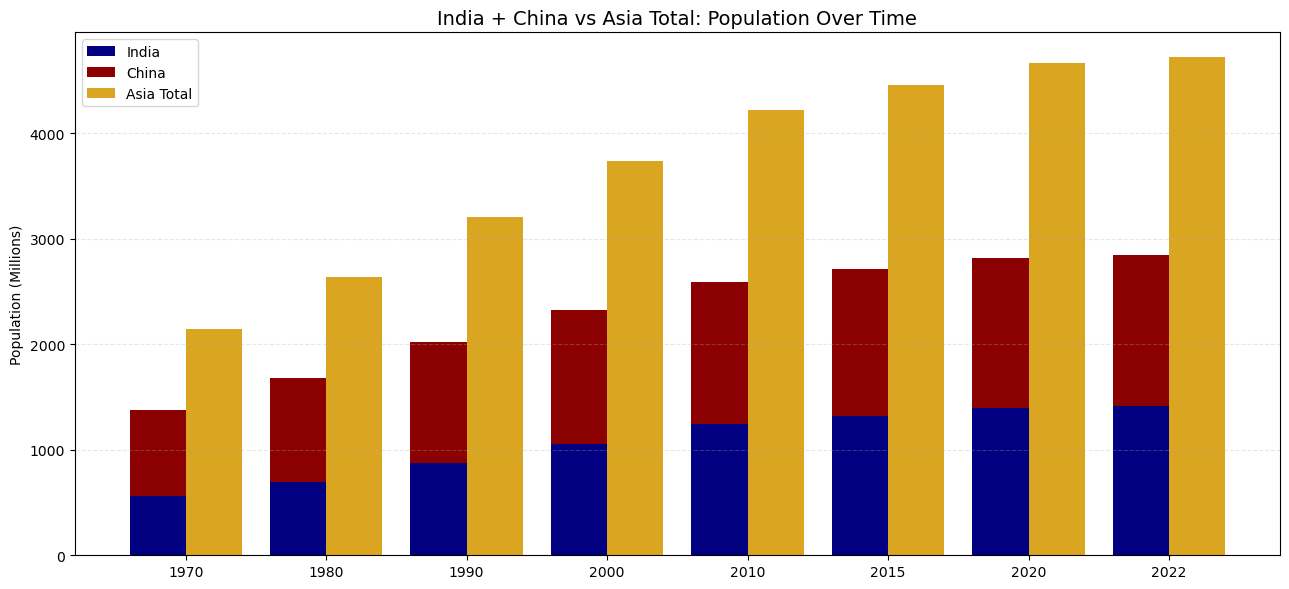

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("world_population_withContinent.csv")

# Filter for Asia only
asia_df = df[df['Continent'] == 'Asia']

# Years to analyze
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
         '2010 Population', '2015 Population', '2020 Population', '2022 Population']

# Clean population values
for year in years:
    asia_df[year] = asia_df[year].astype(str).str.replace(',', '').astype(float)

# Get individual country populations
india_pop = asia_df[asia_df['Country/Territory'] == 'India'].iloc[0][years]
china_pop = asia_df[asia_df['Country/Territory'] == 'China'].iloc[0][years]
asia_total = asia_df[years].sum()

# Convert index to years
years_clean = [int(y.split()[0]) for y in years]
x = range(len(years_clean))
bar_width = 0.4

# Plot
plt.figure(figsize=(13, 6))

# Stacked bars for India + China
plt.bar([i - bar_width/2 for i in x], india_pop.values / 1_000_000, width=bar_width,
        label='India', color='navy')
plt.bar([i - bar_width/2 for i in x], china_pop.values / 1_000_000, width=bar_width,
        bottom=india_pop.values / 1_000_000, label='China', color='darkred')

# Asia total bar (separate)
plt.bar([i + bar_width/2 for i in x], asia_total.values / 1_000_000, width=bar_width,
        label='Asia Total', color='goldenrod')

# Labels and styling
plt.xticks(x, years_clean)
plt.ylabel("Population (Millions)")
plt.title("India + China vs Asia Total: Population Over Time", fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


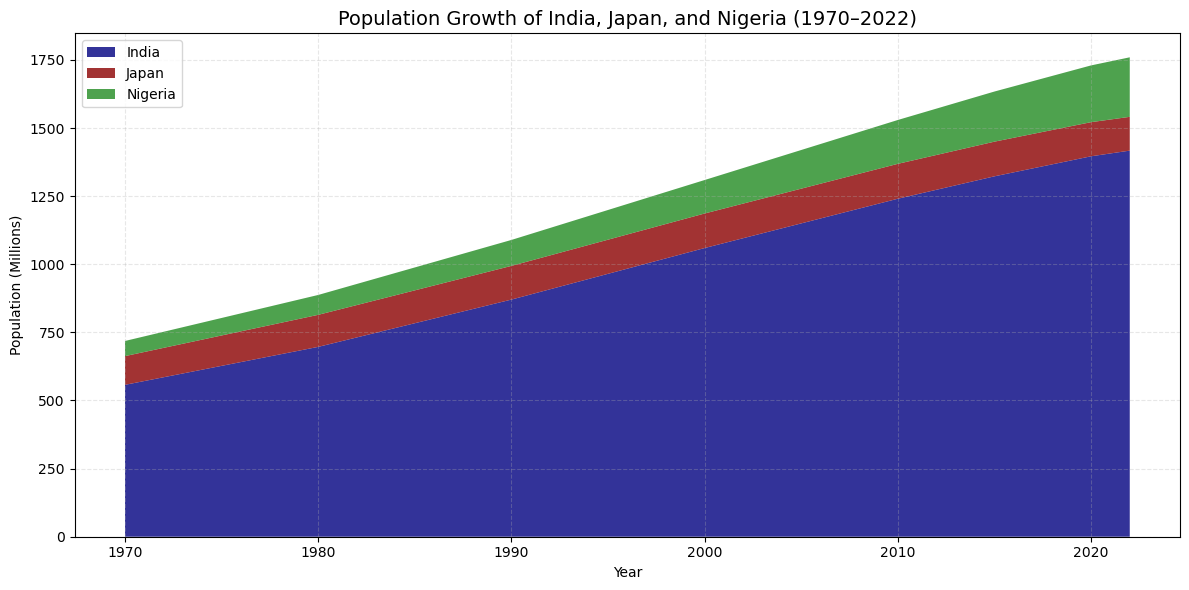

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("world_population_withContinent.csv")

# Choose countries
countries = ['India', 'Japan', 'Nigeria']
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
         '2010 Population', '2015 Population', '2020 Population', '2022 Population']

# Clean data
for year in years:
    df[year] = df[year].astype(str).str.replace(',', '').astype(float)

# Filter and structure data
selected_df = df[df['Country/Territory'].isin(countries)]
pop_data = selected_df.set_index('Country/Territory')[years].T
pop_data.index = [int(y.split()[0]) for y in pop_data.index]
pop_data = pop_data / 1_000_000  # convert to millions

# Plot
plt.figure(figsize=(12, 6))
plt.stackplot(pop_data.index, 
              pop_data['India'], pop_data['Japan'], pop_data['Nigeria'],
              labels=['India', 'Japan', 'Nigeria'],
              colors=['navy', 'darkred', 'forestgreen'],
              alpha=0.8)

plt.title("Population Growth of India, Japan, and Nigeria (1970-2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.legend(loc='upper left')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()
